In [1]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download as dd
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.regression.linear_model import GLS
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data_dict = dd.get_dataframes()

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [3]:
data_dict.keys()

dict_keys(['parcel', 'res_bldg', 'rp_sale', 'lookup'])

In [4]:
ordinal_features, categorical_features = dd.get_tables(data_dict)

In [5]:
ordinal_features

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0
1,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0
3,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0
4,360000,0,1,1.0,7,1380,0,0,0,1380,0,0,0,0,480,100,0,230,3,0,0,2,0,0,0,0,1996,0,4,0,12200,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,669950,0,1,2.0,8,1193,0,0,0,2482,0,0,0,0,800,300,0,0,5,1,0,3,2,0,0,0,2018,0,3,0,11000,0,0,0,0,0,0,0,0,0,0,0,0,2
26102,1150000,0,1,1.5,7,1340,0,0,0,2910,850,850,0,7,0,0,0,140,4,0,1,1,0,1,0,0,1945,0,4,0,8360,0,0,0,0,0,0,0,0,0,0,0,0,0
26103,764500,25,1,1.0,8,1740,0,0,0,2900,1160,1160,0,7,0,230,0,0,4,1,0,1,0,1,0,1,1955,0,4,0,14889,0,0,0,0,0,0,0,0,0,0,0,0,0
26104,469000,0,1,2.0,9,1240,0,0,0,2420,0,0,0,0,510,40,0,0,4,1,0,2,0,1,0,0,1990,0,3,4610,6175,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
categorical_features

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,1,8,5,2,2,1,1,2,1,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
26102,1,8,5,1,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
26103,1,8,6,1,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
26104,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N


In [7]:
ordinal_features.corr()

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
SalePrice,1.000000,0.071153,0.002149,0.289349,0.563599,0.238252,0.087921,-0.005678,0.012824,0.518041,0.191626,0.194504,0.060636,0.180913,0.133846,0.210726,-0.000739,0.163142,0.258522,0.144654,0.169849,0.280174,0.112755,0.150429,-0.068401,0.067314,0.119194,0.045018,-0.067366,0.073562,0.041981,0.002818,0.122813,0.083490,0.177548,0.089089,0.099939,0.098820,0.078007,0.013080,0.034963,0.014000,0.012476,-0.009102
BrickStone,0.071153,1.000000,-0.003346,-0.132983,0.011377,0.048006,-0.029148,-0.005457,0.017003,-0.006546,0.176409,0.126881,0.019065,0.090635,-0.100068,-0.047891,0.008838,-0.035370,-0.032791,-0.070172,0.023573,-0.087321,-0.055902,0.129088,-0.030766,0.181517,-0.177461,-0.012878,0.059123,-0.021543,-0.005404,0.030425,0.083782,0.043140,0.099901,0.033480,0.091166,0.059135,-0.003856,0.014736,-0.012321,0.001350,-0.002468,0.036326
NbrLivingUnits,0.002149,-0.003346,1.000000,0.011409,0.002021,0.022428,0.001927,0.007207,0.016407,0.038935,0.008829,0.017741,-0.005904,0.003359,0.018202,0.002226,-0.001011,0.000746,0.033275,0.007977,0.028018,0.024877,-0.004024,-0.007995,-0.008882,0.003452,0.007276,0.009248,-0.008401,0.018158,0.003714,0.016834,0.011629,-0.002676,0.001069,-0.003224,0.009569,-0.005050,-0.002363,-0.003953,0.006944,-0.002725,-0.000742,0.003007
Stories,0.289349,-0.132983,0.011409,1.000000,0.506393,-0.264207,0.446643,0.002592,0.000723,0.354337,-0.319179,-0.283700,-0.108792,-0.156311,0.248813,0.200184,-0.019238,0.004284,0.184331,0.413604,-0.023893,0.381898,0.131314,-0.092532,-0.112617,-0.302191,0.594878,-0.065427,-0.357412,0.158948,-0.036210,-0.013590,-0.031375,-0.024254,-0.037312,0.014429,-0.044868,-0.041137,-0.005986,-0.017824,0.014387,-0.012790,-0.007699,-0.015319
BldgGrade,0.563599,0.011377,0.002021,0.506393,1.000000,0.331233,0.115479,-0.011226,0.013772,0.669409,0.013052,0.058468,0.068590,0.092674,0.437642,0.272883,-0.029107,0.161959,0.371825,0.356377,0.143927,0.438458,0.282153,0.137724,-0.122098,0.014709,0.533336,-0.078302,-0.235251,0.193028,0.026827,0.026936,0.063826,0.052760,0.102372,0.047465,0.044061,0.027649,0.049887,-0.014877,0.022946,-0.012019,0.004025,-0.066887
SqFt1stFloor,0.238252,0.048006,0.022428,-0.264207,0.331233,1.000000,-0.216426,0.025646,0.045016,0.611305,0.069671,0.076610,0.027362,-0.125942,0.396265,0.259791,-0.011355,0.104032,0.395697,0.014871,0.140763,0.232448,0.270847,0.144880,0.079351,0.190170,-0.005850,0.037012,0.101374,0.052995,0.184075,0.070366,0.054208,0.070663,0.090762,-0.005295,0.049153,0.035626,0.042377,0.034146,0.021169,0.031683,0.004914,-0.086134
SqFtUpperFloor,0.087921,-0.029148,0.001927,0.446643,0.115479,-0.216426,1.000000,-0.004699,-0.004970,-0.015111,-0.094883,-0.088359,-0.015534,-0.065099,-0.080669,-0.032145,0.012692,0.073596,-0.038830,0.039097,0.047205,0.022051,-0.053712,-0.081028,-0.035830,-0.065436,0.185199,-0.021988,-0.101441,0.018391,-0.035756,-0.000088,-0.008940,-0.008890,-0.003420,0.022646,-0.009689,-0.009793,-0.008270,-0.004907,-0.009170,-0.008498,-0.002596,0.041229
SqFtUnfinFull,-0.005678,-0.005457,0.007207,0.002592,-0.011226,0.025646,-0.004699,1.000000,0.014786,-0.008812,0.000279,-0.007048,0.000062,-0.008138,0.017275,0.003658,0.008800,0.004874,-0.013091,-0.021096,0.005022,-0.012037,0.014987,-0.010575,0.002581,0.002526,-0.009652,0.005953,-0.011182,-0.004595,0.028997,0.055219,-0.003502,0.029532,0.008543,-0.001917,-0.003852,0.002369,-0.001405,-0.002351,-0.001944,-0.001621,-0.000441,0.004908
SqFtUnfinHalf,0.012824,0.017003,0

# running scaling functions for feature selection

In [51]:
SS = StandardScaler()
scaled_ords = pd.DataFrame(SS.fit_transform(ordinal_features))
scaled_ords.columns = ordinal_features.columns

In [52]:
scaled_ords

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,-0.481198,-0.193102,-0.047512,2.679175,0.387351,-1.870875,6.847807,-0.028257,-0.029891,-0.611656,-0.806555,-0.660085,-0.460104,-0.789398,-0.065742,-0.640867,-0.169632,0.380026,-1.520362,1.039708,-0.817896,-0.827100,-1.046615,1.598929,-0.252542,-0.421203,0.220683,-0.213602,-0.634985,-0.288115,-0.225975,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
1,-0.127423,-0.193102,-0.047512,0.838387,0.387351,0.393329,-0.166278,-0.028257,-0.029891,1.477107,-0.806555,-0.660085,-0.460104,-0.789398,1.197416,-0.640867,-0.169632,-0.630825,1.729453,1.039708,-0.817896,0.646373,0.650883,-0.564985,-0.252542,-0.421203,0.853948,-0.213602,-0.634985,2.584599,-0.179138,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
2,2.733308,-0.193102,-0.047512,0.838387,1.372543,2.080382,-0.166278,-0.028257,-0.029891,3.421817,-0.806555,-0.660085,-0.460104,-0.789398,0.836514,2.044942,-0.169632,-0.630825,1.729453,2.977088,0.775617,2.119846,0.650883,-0.564985,-0.252542,-0.421203,1.265569,-0.213602,-0.634985,-0.288115,-0.174897,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
3,0.362834,-0.193102,-0.047512,0.838387,0.387351,-1.404715,-0.166278,-0.028257,-0.029891,-0.635665,0.228002,0.191693,0.725225,1.479003,-0.931907,-0.640867,-0.169632,-0.074857,-0.437091,1.039708,2.369131,-0.827100,0.650883,-0.564985,-0.252542,-0.421203,0.632305,-0.213602,-0.634985,-0.288115,-0.246191,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
4,-1.163607,-0.193102,-0.047512,-1.002401,-0.597841,0.371131,-0.166278,-0.028257,-0.029891,-0.827735,-0.806555,-0.660085,-0.460104,-0.789398,0.800423,0.254403,-0.169632,0.531654,-0.437091,-0.897673,-0.817896,0.646373,-1.046615,-0.564985,-0.252542,-0.421203,0.568979,-0.213602,0.811888,-0.288115,-0.060767,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25775,-0.050382,-0.193102,-0.047512,0.838387,0.387351,-0.043973,-0.166278,-0.028257,-0.029891,0.495148,-0.806555,-0.660085,-0.460104,-0.789398,1.955310,2.044942,-0.169632,-0.630825,1.729453,1.039708,-0.817896,2.119846,2.348382,-0.564985,-0.252542,-0.421203,1.265569,-0.213602,-0.634985,-0.288115,-0.081205,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,3.275094
25776,1.673778,-0.193102,-0.047512,-0.082007,-0.597841,0.282338,-0.166278,-0.028257,-0.029891,1.008936,0.763755,1.408518,-0.460104,1.195453,-0.931907,-0.640867,-0.169632,0.076771,0.646181,-0.897673,0.775617,-0.827100,-1.046615,1.598929,-0.252542,-0.421203,-1.045845,-0.213602,0.811888,-0.288115,-0.126169,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
25777,0.289206,1.406956,-0.047512,-1.002401,0.387351,1.170261,-0.166278,-0.028257,-0.029891,0.996932,1.336456,2.162949,-0.460104,1.195453,-0.931907,1.418253,-0.169632,-0.630825,0.646181,1.039708,-0.817896,-0.827100,-1.046615,1.5989

# using RFE to auto select initial ordinal features based on scaled data
# then selecting chosen features from unscaled table

In [74]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=20)
select = select.fit(X = scaled_ords.drop('SalePrice', axis=1), y = scaled_ords['SalePrice'])
predictors = ordinal_features[scaled_ords.columns[[True] + list(select.support_) ]]
predictors

,SalePrice,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtDeck,Bedrooms,Bath3qtrCount,BathFullCount,YrBuilt,AddnlCost,Olympics,SeattleSkyline,LakeWashington,LakeSammamish
0,550000,8,370,650,1560,0,0,0,0,240,0,200,2,0,1,1985,0,0,0,0,0
1,648500,8,1390,0,3300,0,0,0,0,590,0,0,5,0,2,2005,6000,0,0,0,0
2,1445000,9,2150,0,4920,0,0,0,0,490,300,0,5,1,3,2018,0,0,0,0,0
3,785000,8,580,0,1540,560,350,210,8,0,0,110,3,2,1,1998,0,0,0,0,0
4,360000,7,1380,0,1380,0,0,0,0,480,100,230,3,0,2,1996,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,669950,8,1193,0,2482,0,0,0,0,800,300,0,5,0,3,2018,0,0,0,0,0
26102,1150000,7,1340,0,2910,850,850,0,7,0,0,140,4,1,1,1945,0,0,0,0,0
26103,764500,8,1740,0,2900,1160,1160,0,7,0,230,0,4,0,1,1955,0,0,0,0,0
26104,469000,9,1240,0,2420,0,0,0,0,510,40,0,4,0,2,1990,4610,0,0,0,0


In [75]:
model_25_ords = produce_model(predictors, 'SalePrice')

In [76]:
model_25_ords.params.sort_values()

Bedrooms             -3.144166e+04
YrBuilt              -2.526824e+03
SqFtFinBasement      -1.264088e+02
SqFtGarageAttached   -1.129502e+02
SqFtGarageBasement   -9.637310e+01
SqFt1stFloor         -8.477767e+01
AddnlCost            -6.024067e+00
SqFtTotBasement       4.090091e+01
SqFtDeck              4.772615e+01
SqFtOpenPorch         6.886501e+01
SqFtUpperFloor        1.183106e+02
SqFtTotLiving         1.559762e+02
FinBasementGrade      7.219544e+03
Olympics              3.364300e+04
BathFullCount         3.610603e+04
LakeWashington        4.081853e+04
Bath3qtrCount         4.419354e+04
SeattleSkyline        5.388696e+04
LakeSammamish         9.355040e+04
BldgGrade             1.301118e+05
Intercept             4.521041e+06
dtype: float64

In [77]:
model_25_ords.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     1095.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:55:48   Log-Likelihood:            -3.5185e+05
No. Observations:               25780   AIC:                         7.037e+05
Df Residuals:                   25759   BIC:                         7.039e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.521e+06   1.21e+05     37.374      0.000    4.28e+06    4.76e+06
BldgGrade           1.301e+05   2003.932     64.928      0.000    1.26e+05    1.34e+05
SqFt1stFloor         -84.7777      4.363    -19.432      0.000     -93.329     -76.226
SqFtUpperFloor       118.3106     15.043      7.865      0.000      88.826     147.796
SqFtTotLiving        155.9762      3.765     41.428      0.000     148.597     163.356
SqFtTotBasement       40.9009      6.141      6.660      0.000      28.864      52.938
SqFtFinBasement     -126.4088      8.257    -15.310      0.000    -142.592    -110.225
SqFtGarageBasement   -96.3731     10.761     -8.956      0.000    -117.465     -75.281
FinBasementGrade    7219.5435    818.463      8.821      0.000    5615.310    8823.777
SqFtGarageAttached  -112.9502      7.012    -16.109      0.000    -126.693     -99.207
SqFtOpenPorch         68.8650     13.006      5.295      0.000      43.373      94.357
SqFtDeck              47.7262      6.992      6.826      0.000      34.021      61.431
Bedrooms           -3.144e+04   1922.375    -16.356      0.000   -3.52e+04   -2.77e+04
Bath3qtrCount       4.419e+04   2762.073     16.000      0.000    3.88e+04    4.96e+04
BathFullCount       3.611e+04   3075.650     11.739      0.000    3.01e+04    4.21e+04
YrBuilt            -2526.8244     62.805    -40.233      0.000   -2649.927   -2403.722
AddnlCost             -6.0241      0.631     -9.551      0.000      -7.260      -4.788
Olympics            3.364e+04   4134.015      8.138      0.000    2.55e+04    4.17e+04
SeattleSkyline      5.389e+04   7484.858      7.199      0.000    3.92e+04    6.86e+04
LakeWashington      4.082e+04   5108.440      7.990      0.000    3.08e+04    5.08e+04
LakeSammamish       9.355e+04   1.14e+04      8.197      0.000    7.12e+04    1.16e+05
==============================================================================
Omnibus:                     1509.529   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2742.562
Skew:                           0.446   Prob(JB):                         0.00
Kurtosis:                       4.326   Cond. No.                     3.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# working to improve model by adding categorical features

In [58]:
target = 'SalePrice'

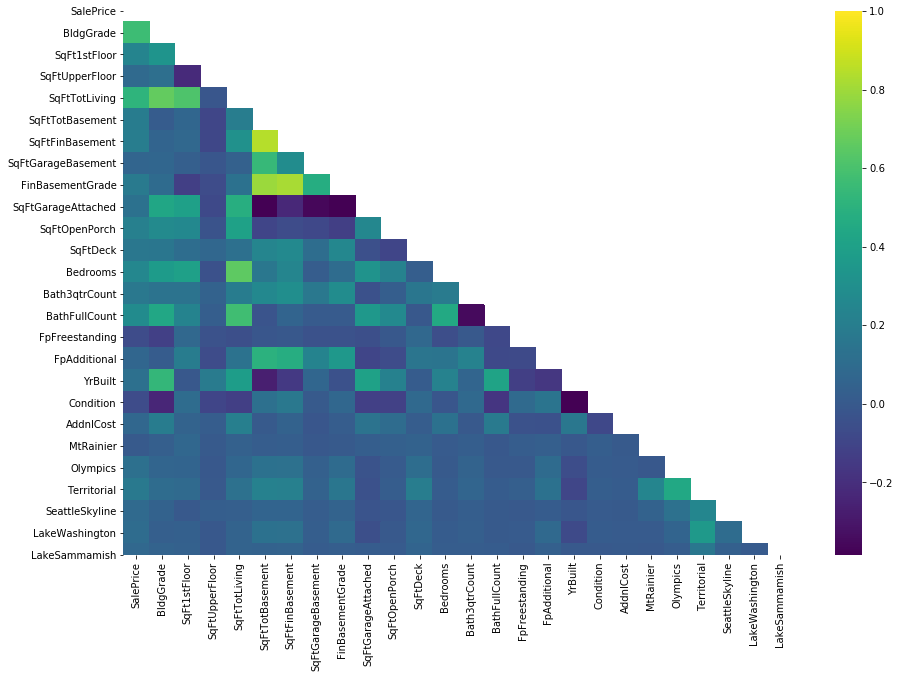

In [59]:
make_heatmap(predictors)

In [79]:
predictors_19 = predictors.drop(['FinBasementGrade'], axis = 1)
produce_model(predictors_19, target).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1145.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:57:56   Log-Likelihood:            -3.5189e+05
No. Observations:               25780   AIC:                         7.038e+05
Df Residuals:                   25760   BIC:                         7.040e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.353e+06    1.2e+05     36.386      0.000    4.12e+06    4.59e+06
BldgGrade           1.345e+05   1944.973     69.137      0.000    1.31e+05    1.38e+05
SqFt1stFloor         -92.5683      4.279    -21.634      0.000    -100.955     -84.181
SqFtUpperFloor        96.8063     14.866      6.512      0.000      67.668     125.945
SqFtTotLiving        151.6433      3.738     40.564      0.000     144.316     158.971
SqFtTotBasement       49.0113      6.081      8.060      0.000      37.092      60.930
SqFtFinBasement      -86.6911      6.931    -12.508      0.000    -100.276     -73.106
SqFtGarageBasement   -78.2175     10.578     -7.394      0.000     -98.951     -57.484
SqFtGarageAttached  -124.6213      6.896    -18.072      0.000    -138.138    -111.105
SqFtOpenPorch         67.0036     13.023      5.145      0.000      41.477      92.530
SqFtDeck              50.5071      6.996      7.220      0.000      36.795      64.219
Bedrooms           -3.217e+04   1923.469    -16.724      0.000   -3.59e+04   -2.84e+04
Bath3qtrCount       4.692e+04   2748.865     17.067      0.000    4.15e+04    5.23e+04
BathFullCount       3.828e+04   3070.367     12.466      0.000    3.23e+04    4.43e+04
YrBuilt            -2446.8660     62.240    -39.313      0.000   -2568.861   -2324.871
AddnlCost             -6.1400      0.632     -9.722      0.000      -7.378      -4.902
Olympics            3.278e+04   4139.007      7.919      0.000    2.47e+04    4.09e+04
SeattleSkyline      5.382e+04   7496.004      7.180      0.000    3.91e+04    6.85e+04
LakeWashington      3.958e+04   5114.104      7.739      0.000    2.96e+04    4.96e+04
LakeSammamish       9.009e+04   1.14e+04      7.886      0.000    6.77e+04    1.12e+05
==============================================================================
Omnibus:                     1454.764   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2610.598
Skew:                           0.436   Prob(JB):                         0.00
Kurtosis:                       4.292   Cond. No.                     3.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

one hotting BldgGrade

In [80]:
bldg_grade = predictors_19.pop('BldgGrade')

In [88]:
bldg_grade.value_counts()

7     9780
8     8910
9     3377
6     2419
10     847
5      282
11     127
4       30
12       4
3        4
Name: BldgGrade, dtype: int64

In [91]:
pred_1hot_bldgGrade = pd.concat([predictors_19, pd.get_dummies(bldg_grade, prefix = 'BldgGrade', drop_first = True)], axis = 1, sort = False)

In [92]:
produce_model(pred_1hot_bldgGrade, target).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     825.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:14:00   Log-Likelihood:            -3.5174e+05
No. Observations:               25780   AIC:                         7.035e+05
Df Residuals:                   25752   BIC:                         7.038e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.037e+06    1.6e+05     31.515      0.000    4.72e+06    5.35e+06
SqFt1stFloor         -85.3347      4.289    -19.895      0.000     -93.742     -76.928
SqFtUpperFloor        96.8601     14.784      6.552      0.000      67.883     125.837
SqFtTotLiving        141.9006      3.795     37.391      0.000     134.462     149.339
SqFtTotBasement       54.6238      6.067      9.004      0.000      42.733      66.515
SqFtFinBasement      -83.7878      6.898    -12.146      0.000     -97.308     -70.267
SqFtGarageBasement   -80.4389     10.537     -7.634      0.000    -101.092     -59.785
SqFtGarageAttached  -121.3832      6.889    -17.620      0.000    -134.886    -107.880
SqFtOpenPorch         60.4820     12.966      4.664      0.000      35.067      85.897
SqFtDeck              46.0509      6.963      6.613      0.000      32.403      59.699
Bedrooms           -2.841e+04   1951.458    -14.556      0.000   -3.22e+04   -2.46e+04
Bath3qtrCount       4.706e+04   2745.448     17.142      0.000    4.17e+04    5.24e+04
BathFullCount       3.864e+04   3055.308     12.645      0.000    3.26e+04    4.46e+04
YrBuilt            -2408.4086     63.454    -37.955      0.000   -2532.781   -2284.036
AddnlCost             -5.8982      0.633     -9.313      0.000      -7.140      -4.657
Olympics            3.172e+04   4118.169      7.702      0.000    2.36e+04    3.98e+04
SeattleSkyline      5.203e+04   7455.919      6.979      0.000    3.74e+04    6.66e+04
LakeWashington      3.876e+04   5086.820      7.619      0.000    2.88e+04    4.87e+04
LakeSammamish       8.747e+04   1.14e+04      7.695      0.000    6.52e+04     1.1e+05
BldgGrade_4         8.303e+04   1.09e+05      0.765      0.444    -1.3e+05    2.96e+05
BldgGrade_5         6675.5350   1.03e+05      0.065      0.948   -1.95e+05    2.08e+05
BldgGrade_6          4.58e+04   1.02e+05      0.449      0.654   -1.54e+05    2.46e+05
BldgGrade_7         1.651e+05   1.02e+05      1.617      0.106    -3.5e+04    3.65e+05
BldgGrade_8         3.047e+05   1.02e+05      2.983      0.003    1.05e+05    5.05e+05
BldgGrade_9         4.815e+05   1.02e+05      4.710      0.000    2.81e+05    6.82e+05
BldgGrade_10        5.786e+05   1.02e+05      5.646      0.000    3.78e+05    7.79e+05
BldgGrade_11        6.604e+05   1.04e+05      6.354      0.000    4.57e+05    8.64e+05
BldgGrade_12        4.804e+05   1.45e+05      3.308      0.001    1.96e+05    7.65e+05
==============================================================================
Omnibus:                     1363.203   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2504.015
Skew:                           0.406   Prob(JB):                         0.00
Kurtosis:                       4.292   Cond. No.                     

that made a small improvement, time to try adding other categorical features

In [115]:
one_hot_cats = pd.get_dummies(categorical_features, prefix = categorical_features.columns, columns = categorical_features.columns, drop_first = True)

one_hot_cats = pd.concat([ordinal_features[target], one_hot_cats], axis = 1, sort = False)

one_hot_cats

,SalePrice,SaleReason_3,SaleReason_4,SaleReason_5,SaleReason_8,SaleReason_10,SaleReason_12,SaleReason_13,SaleReason_14,SaleReason_16,SaleReason_18,SaleReason_19,PropertyClass_2,PropertyClass_3,PropertyClass_7,PropertyClass_8,PropertyClass_9,HeatSystem_1,HeatSystem_2,HeatSystem_3,HeatSystem_4,HeatSystem_5,HeatSystem_6,HeatSystem_7,HeatSystem_8,HeatSource_1,HeatSource_2,HeatSource_3,HeatSource_4,HeatSource_5,HeatSource_6,HeatSource_7,PresentUse_6,PresentUse_29,PresentUse_300,HBUAsIfVacant_1,HBUAsIfVacant_6,HBUAsIfVacant_9,HBUAsIfVacant_13,HBUAsIfVacant_14,HBUAsIfVacant_15,HBUAsIfVacant_16,HBUAsIfVacant_21,HBUAsImproved_1,HBUAsImproved_2,HBUAsImproved_4,WaterSystem_1,WaterSystem_2,WaterSystem_3,WaterSystem_4,SewerSystem_1,SewerSystem_2,SewerSystem_3,SewerSystem_4,Access_1,Access_2,Access_3,Access_4,Access_5,InadequateParking_1,InadequateParking_2,StreetSurface_1,StreetSurface_2,StreetSurface_3,StreetSurface_4,Topography_1,WfntLocation_1,WfntLocation_3,WfntLocation_4,WfntLocation_5,WfntLocation_6,WfntLocation_7,WfntLocation_8,WfntLocation_9,WfntBank_1,WfntBank_2,WfntBank_3,WfntPoorQuality_1,WfntRestrictedAccess_1,WfntRestrictedAccess_2,WfntRestrictedAccess_3,WfntAccessRights_Y,WfntProximityInfluence_Y,TidelandShoreland_1,TidelandShoreland_2,TidelandShoreland_3,PowerLines_Y,OtherNuisances_Y,AdjacentGolfFairway_Y,AdjacentGreenbelt_Y
0,550000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,648500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1445000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,785000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,360000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,669950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26102,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26103,764500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26104,469000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
cat_model = produce_model(one_hot_cats, target)

In [118]:
cat_coefs = cat_model.params.sort_values()

In [120]:
categorical_features['WfntLocation'].value_counts()

0    25509
8      105
9       76
3       66
6       13
5        4
1        4
7        2
4        1
Name: WfntLocation, dtype: int64